### **1. Import the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

### **2. Reading and Exploring the data**

In [ ]:
customers = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.drop(columns = 'CustomerID', inplace = True)

In [ ]:
customers.dtypes  #print the datatype of values present in each column

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
customers.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.drop_duplicates(inplace = True) #remove all the duplicate rows

#### **Encode the Gender column using Label Encoder**

In [ ]:
le = LabelEncoder()

customers['Gender'] = le.fit_transform(customers['Gender'])

### **Machine Learning Process**

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
X = customers.iloc[:, 1:4].values  #.values will convert the customers dataframe into a 2D array

#### **WCSS Process to find the optimal number of clusters**

In [ ]:
wcss = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X)

  print(kmeans.inertia_)
  wcss.append(kmeans.inertia_)

308812.7800000001
221173.71600877217
143342.75157170597
109997.0887226427
82608.63809385581
58300.443321590676
51082.54296792138
44344.949801777206
41260.63871575798


#### Plot the graph between wcss and its corresponding k-values

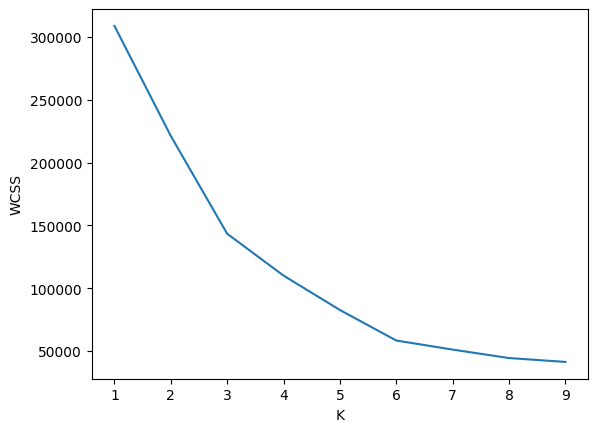

In [ ]:
plt.plot(range(1, 10), wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

##### **Observation:** The optimal number of clusters is 6.

#### Apply the K-Means Clustering on the data

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(X) #start making 6 clusters and divide the data points in those clusters

y = kmeans.predict(X)

In [ ]:
kmeans.cluster_centers_ #centroids

array([[ 43.28571429,  54.81818182,  49.88311688],
       [ 25.52173913,  26.30434783,  78.56521739],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 40.17857143,  78.89285714,  17.42857143],
       [ 41.        , 109.7       ,  22.        ],
       [ 45.2173913 ,  26.30434783,  20.91304348]])

In [ ]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [ ]:
final_df = pd.concat([customers, output], axis = 1)

In [ ]:
final_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,5
1,1,21,15,81,1
2,0,20,16,6,5
3,0,23,16,77,1
4,0,31,17,40,5
